In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


## Introduction to tensors
### Creating tensors

In [ ]:
scalar = torch.tensor(4)
scalar

tensor(4)

In [ ]:
scalar.ndim

0

In [ ]:
# Get the original data back from tensor
scalar.item()

4

In [ ]:
# Vector
vector = torch.tensor([10, 11])
vector

tensor([10, 11])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# Matrix
matrix = torch.tensor([[1, 2, 3],
                       [5, 6, 7],
                       [8, 9, 10]])

matrix

tensor([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 8,  9, 10]])

In [ ]:
matrix.ndim

2

In [ ]:
matrix.shape

torch.Size([3, 3])

In [ ]:
matrix[0]

tensor([1, 2, 3])

In [ ]:
matrix[:, 0:1]

tensor([[1],
        [5],
        [8]])

In [ ]:
# Tensor
tensor = torch.tensor([[[1, 2, 3],
                        [3, 5, 6]],
                       [[1, 2, 3],
                        [3, 5, 6]],
                       [[1, 2, 3],
                        [3, 5, 6]]])
tensor

tensor([[[1, 2, 3],
         [3, 5, 6]],

        [[1, 2, 3],
         [3, 5, 6]],

        [[1, 2, 3],
         [3, 5, 6]]])

In [ ]:
tensor.ndim

3

In [ ]:
tensor.shape

torch.Size([3, 2, 3])

### Random tensors

In [ ]:
# random tensor of shape (2, 3, 3)
rand_tensor = torch.rand((2, 3, 3))
rand_tensor

tensor([[[0.6720, 0.1618, 0.1787],
         [0.0845, 0.0360, 0.5776],
         [0.6622, 0.2789, 0.0710]],

        [[0.9913, 0.3016, 0.7966],
         [0.2294, 0.1861, 0.0672],
         [0.5127, 0.0389, 0.5378]]])

In [ ]:
rand_tensor.shape

torch.Size([2, 3, 3])

In [ ]:
# create a random tensor with similar to an image
random_image_tensor = torch.rand((256, 256, 3)) # height, width, channels
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([256, 256, 3]), 3)

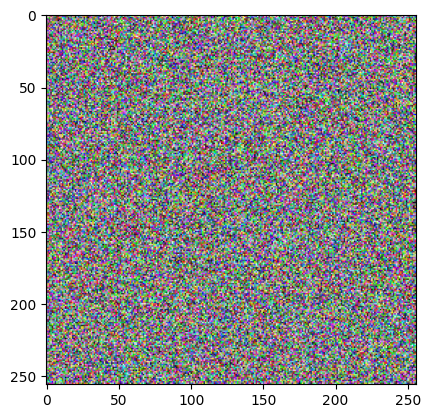

In [ ]:
plt.imshow(random_image_tensor)   # plots image based on the input
plt.show()

### Zeros and Ones tensors

In [ ]:
# Create a tensor of all zeros and ones of shape (3, 3)
zeros = torch.zeros((3, 3))
zeros, zeros.shape

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 torch.Size([3, 3]))

In [ ]:
ones = torch.ones((3, 3))
ones, ones.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 torch.Size([3, 3]))

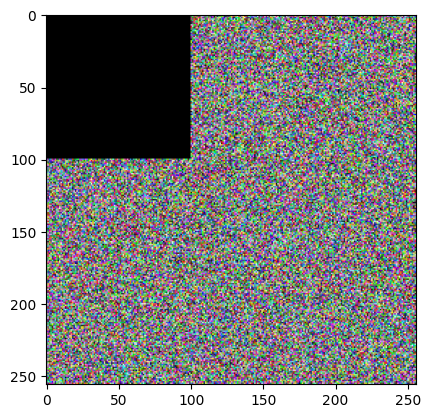

In [ ]:
# Lets mask the image with the help of zeros (making some pixels 0)
black_mask = torch.zeros((100, 100, 3))
masked_image_tensor = random_image_tensor
masked_image_tensor[:100, :100, :] = random_image_tensor[:100, :100, :] * black_mask
plt.imshow(masked_image_tensor)
plt.show()

### Creating a range of tensors and tensors-like

In [ ]:
# range tensors
ranged = torch.arange(start=1, end=10)
ranged

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(start=1, end=10, step=2)

tensor([1, 3, 5, 7, 9])

In [ ]:
# tensors like
ten_zeros = torch.zeros_like(ranged)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ten_ones = torch.ones_like(ranged)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor datatypes
**Note:** There are 3 common errors you may run into if you are using Pytorch tensors in Deep learning :

1. Tensors not in right shape
2. Tensors not it right datatype
3. Tensors not in right device

In [ ]:
tensor = torch.tensor([1, 2, 3],
                      dtype=None,   # the datatype of the tensoir (can be int64, float16, etc.)
                      device=None,  # the device your tensor is on (cpu or cuda(gpu))
                      requires_grad=False) # whether or not to track gradient of the tensors
tensor

tensor([1, 2, 3])

In [ ]:
tensor.dtype

torch.int64

In [ ]:
# convert float32 tensor to float16 tensor
float_tensor = torch.tensor([1., 2., 3.], dtype=torch.float32)
float_tensor

tensor([1., 2., 3.])

In [ ]:
float_tensor.dtype

torch.float32

In [ ]:
float_16_tensor = float_tensor.type(dtype=torch.float16)
float_16_tensor.dtype

torch.float16

In [ ]:
# Getting info. from tensors
tensor = torch.rand((3, 4))
print("Datatype of tensor : ", tensor.dtype)
print("Shape of the tensor : ", tensor.shape)
print("Device of the tensor : ", tensor.device)

Datatype of tensor :  torch.float32
Shape of the tensor :  torch.Size([3, 4])
Device of the tensor :  cpu


### Tensor Operations
1. Addition
2. Substraction
3. Multiplication (element-wise)
4. Division
5. Matrix Multiplication

In [ ]:
# Addition
tensor = torch.tensor([1, 2, 3])
tensor + 10, torch.add(tensor, 10)

(tensor([11, 12, 13]), tensor([11, 12, 13]))

In [ ]:
# Substraction
tensor - 10, torch.subtract(tensor, 10)

(tensor([-9, -8, -7]), tensor([-9, -8, -7]))

In [ ]:
# Multiplication (element-wise)
tensor * 10, torch.multiply(tensor, 10)

(tensor([10, 20, 30]), tensor([10, 20, 30]))

In [ ]:
# Division
tensor / 10, torch.divide(tensor, 10)

(tensor([0.1000, 0.2000, 0.3000]), tensor([0.1000, 0.2000, 0.3000]))

In [ ]:
# Matrix multiplication (Dot product)

A = torch.randint(low=1, high=10, size=(2, 3))
B = torch.randint(low=1, high=10, size=(3, 2))

print(f"A = {A}\n")  # Shape = 2 x 3
print(f"B = {B}")    # Shape = 3 x 2

A = tensor([[4, 5, 7],
        [9, 8, 6]])

B = tensor([[7, 5],
        [2, 4],
        [9, 5]])


In [ ]:
torch.matmul(A, B), torch.matmul(A, B).shape # 2 x 2

(tensor([[101,  75],
         [133, 107]]),
 torch.Size([2, 2]))

In [ ]:
A @ B # another version of matmul

tensor([[101,  75],
        [133, 107]])

In [ ]:
# But what if we want to multiply the same versions of tensors
# Change one of the tensors to its transpose as per requirement
# Remember that A X B.transpose != A.transpose X B
A = torch.randint(1, 5, (3, 2))
B = torch.randint(1, 5, (3, 2))
A.shape, B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
B.T, B

(tensor([[4, 3, 3],
         [2, 3, 4]]),
 tensor([[4, 2],
         [3, 3],
         [3, 4]]))

In [ ]:
torch.matmul(A, B.T)

tensor([[12, 15, 19],
        [14, 12, 13],
        [18, 15, 16]])

In [ ]:
torch.matmul(A.T, B)

tensor([[25, 27],
        [22, 15]])

In [ ]:
B.shape, B.T.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

### Tensor aggregations (Min, Max, Mean, etc.)

In [ ]:
x = torch.arange(1, 10)
x

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Max
x.max(), torch.max(x)

(tensor(9), tensor(9))

In [ ]:
# Min
x.min(), torch.min(x)

(tensor(1), tensor(1))

In [ ]:
# Mean : Note that mean only works with float tensors
x.type(torch.float32).mean(), torch.mean(x.type(torch.float32))

(tensor(5.), tensor(5.))

In [ ]:
# Sum
x.sum(), torch.sum(x)

(tensor(45), tensor(45))

In [ ]:
# cumulative sum and cumulative product
print(torch.cumsum(x, dim=-1))
print(torch.cumprod(x, dim=-1))

tensor([ 1,  3,  6, 10, 15, 21, 28, 36, 45])
tensor([     1,      2,      6,     24,    120,    720,   5040,  40320, 362880])


In [ ]:
# argmin - finds the index that has the smallest elemnt of tensor
# agrmax - finds the index that has the largest element of tensor

x.argmin(), x.argmax()

(tensor(0), tensor(8))

In [ ]:
print(x.min() == x[0])
print(x.max() == x[8])

tensor(True)
tensor(True)


### Reshaping, stacking, squeezing and unsqueezing tensors

1. reshaping : used to reshape inuput tensors to another compatible shape
2. view : returns a view of input tensors of certain shape but keep the same memory as the original tebsir
3. stacking : combine multiple tensors on top of each other (vstack) or side by side (hstack)
4. squeeze : removes all `1` dimensions from a tensor
5. unsqueeze : add a `1` dimension to the tensor
6. permute : returns a view of the input with dimensions permuted (swapped) in a certain manner
7. concatenate : combine multiple tensors based on the `dim` specified (more popular and used than stacking)

In [ ]:
# rehsape : convert a tensor of shape (2, 2) to (4, ) and (4, 1)
a = torch.tensor([[1, 2],
                  [3, 4]])
torch.reshape(a, (4,))

tensor([1, 2, 3, 4])

In [ ]:
torch.reshape(a, (4,1))

tensor([[1],
        [2],
        [3],
        [4]])

In [ ]:
# view : creating a view is like a copy of it but they share the same memory so changing the view can also change the original tensor
original = torch.arange(1, 10)
view_tensor = original.view(original.shape)
print(original)
print(view_tensor)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
view_tensor[:5] = 5 # changed only view tensor but the original also changes
print(original)
print(view_tensor)

tensor([5, 5, 5, 5, 5, 6, 7, 8, 9])
tensor([5, 5, 5, 5, 5, 6, 7, 8, 9])


In [ ]:
# stacking
a = torch.arange(1, 10)
b = torch.arange(11, 20)
torch.stack((a, b), dim=0)  # same as vstack

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
        [11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
torch.stack((a, b), dim=1) # same as hstack

tensor([[ 1, 11],
        [ 2, 12],
        [ 3, 13],
        [ 4, 14],
        [ 5, 15],
        [ 6, 16],
        [ 7, 17],
        [ 8, 18],
        [ 9, 19]])

In [ ]:
# squeeze
a = torch.randint(1, 10, size=(1, 5))
a, a.shape

(tensor([[4, 6, 3, 5, 8]]), torch.Size([1, 5]))

In [ ]:
a.squeeze(), a.squeeze().shape

(tensor([3, 8, 2, 9, 7]), torch.Size([5]))

In [ ]:
a = torch.randint(1, 10, size=(5, 1))
a, a.shape

(tensor([[2],
         [6],
         [5],
         [9],
         [3]]),
 torch.Size([5, 1]))

In [ ]:
a.squeeze(), a.squeeze().shape

(tensor([2, 6, 5, 9, 3]), torch.Size([5]))

In [ ]:
# unsqueeze
a = torch.randint(1, 10, (5,))
a, a.shape

(tensor([7, 3, 7, 5, 7]), torch.Size([5]))

In [ ]:
a.unsqueeze(dim=0), a.unsqueeze(dim=0).shape

(tensor([[7, 3, 7, 5, 7]]), torch.Size([1, 5]))

In [ ]:
a.unsqueeze(dim=1), a.unsqueeze(dim=1).shape

(tensor([[7],
         [3],
         [7],
         [5],
         [7]]),
 torch.Size([5, 1]))

In [ ]:
# concatenate
a = torch.tensor([[1, 0, 0], [2, 0, 0], [3, 4, 5]])
torch.cat((a, a), dim=0) # same as vstack

tensor([[1, 0, 0],
        [2, 0, 0],
        [3, 4, 5],
        [1, 0, 0],
        [2, 0, 0],
        [3, 4, 5]])

In [ ]:
torch.cat((a, a), dim=1) # same as hstack

tensor([[1, 0, 0, 1, 0, 0],
        [2, 0, 0, 2, 0, 0],
        [3, 4, 5, 3, 4, 5]])

In [ ]:
# permute : specifically used when we want to change the order of dimensions like image data

image = torch.rand(size=(256, 256, 3)) # (height, width, colour_channels)

# convert it to (colour_channels, height, width) because its the specific format for our model (assume)

converted_image = image.permute(2, 0, 1) # (colour_channels, height, width)

print(image.shape)
print(converted_image.shape)

torch.Size([256, 256, 3])
torch.Size([3, 256, 256])


In [ ]:
# Note that it returns an view , so modifying the converted image can also modify original image
converted_image[1, 2, 3] = 999
print(converted_image[1, 2, 3])

tensor(999.)


In [ ]:
print(image[2, 3, 1])

tensor(999.)


### Pytorch Indexing
Indexing in pytorch is the same as indexing in numpy arrays

In [2]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [3]:
# indexing means selecting data from a data structure (in our case it is tensor)
print(x[0])
print(x[0][0])
print(x[0][0][0])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor(1)


In [5]:
# The easier way is by using slicing ":" to select portions of tensors
x = torch.arange(1, 21).reshape((2, 2, 5))
print(x)

tensor([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]],

        [[11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20]]])


In [6]:
# Get all the values of last column
x[:, :, -1]

tensor([[ 5, 10],
        [15, 20]])

In [8]:
# Get the first 2x5 and select from col1 to col3
x[0, :, 1:4]

tensor([[2, 3, 4],
        [7, 8, 9]])

### Pytorch and Numpy arrays
* Data in numpy can be converted to torch.tensor and vice-versa
* Also changing one of them donot reflect the value in other because they donot share the same memory

In [9]:
# numpy to tensor
array = np.arange(1, 10)
tensor = torch.from_numpy(array)
array, tensor

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
array.dtype, tensor.dtype

(dtype('int64'), torch.int64)

In [11]:
# tensor to numpy
tensor = torch.ones((9))
numpy_arr = tensor.numpy()
tensor, numpy_arr

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Reproducibility (taking out the randomness out of random)
* To reduce the randomness in neural network and pytorch comes the concept of a **random seed**
* The random seed helps in controlling the randomness of tensors

In [14]:
# create two random tensors
rand_a = torch.rand(3, 4)
rand_b = torch.rand(3, 4)

print(rand_a)
print(rand_b)
print(rand_a == rand_b)

tensor([[0.0961, 0.1763, 0.5209, 0.1261],
        [0.2241, 0.3289, 0.0589, 0.8640],
        [0.7603, 0.8880, 0.6594, 0.3380]])
tensor([[0.8538, 0.4422, 0.2241, 0.7666],
        [0.0183, 0.8416, 0.2237, 0.1470],
        [0.0819, 0.1089, 0.9563, 0.8982]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [16]:
# create two random tensors but with reproducibility
RANDOM_SEED = 42 # any integer is applicable

torch.manual_seed(RANDOM_SEED)
rand_a = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
rand_b = torch.rand(3, 4)

print(rand_a)
print(rand_b)
print(rand_a == rand_b)   # All true because its reproduced

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


### Running tensors and pytorch objects on the GPUs (for faster computations)
* Use GPUs of the platforms such as Kaggle, Colab, etc. - change the runtime type
* Use GPUs of your own system locally - requires a bit of setup

In [1]:
# Check for gpu access with pytorch - run it by changing runtime to gpu
import torch
torch.cuda.is_available()

True

In [2]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# count the number of gpus
torch.cuda.device_count()

1

In [5]:
# putting tensors and models on gpus for faster computations

# tensor not on gpu
tensor = torch.tensor([1, 2, 3])
print("Tensor : ", tensor)
print("Tensor device : ", tensor.device)

Tensor :  tensor([1, 2, 3])
Tensor device :  cpu


In [6]:
# tensor on gpu
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
tensor = tensor.to(DEVICE)
print("Tensor : ", tensor)
print("Tensor device : ", tensor.device)

Tensor :  tensor([1, 2, 3], device='cuda:0')
Tensor device :  cuda:0


In [7]:
# moving tensor back to cpu
# because tensor on gpu cannot be converted to numpy arrays
tensor.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [8]:
# tensor back on cpu
tensor = tensor.cpu().numpy()
tensor

array([1, 2, 3])